In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'y']
print(len(columns))
adult_data_df = pd.read_csv("../data/raw/adult/adult.data", names=columns)
adult_data_df

15


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,y
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [82]:
df = pd.DataFrame(adult_data_df['workclass'].value_counts())
df

,count
workclass,
Private,22696
Self-emp-not-inc,2541
Local-gov,2093
?,1836
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [105]:
def plot_bars(df, column, figsize=(20, 6)):
    tmp_df = pd.DataFrame(df[column].value_counts())
    f, ax = plt.subplots(figsize=figsize)
    sns.barplot(tmp_df, x=column, y='count', label="Total")

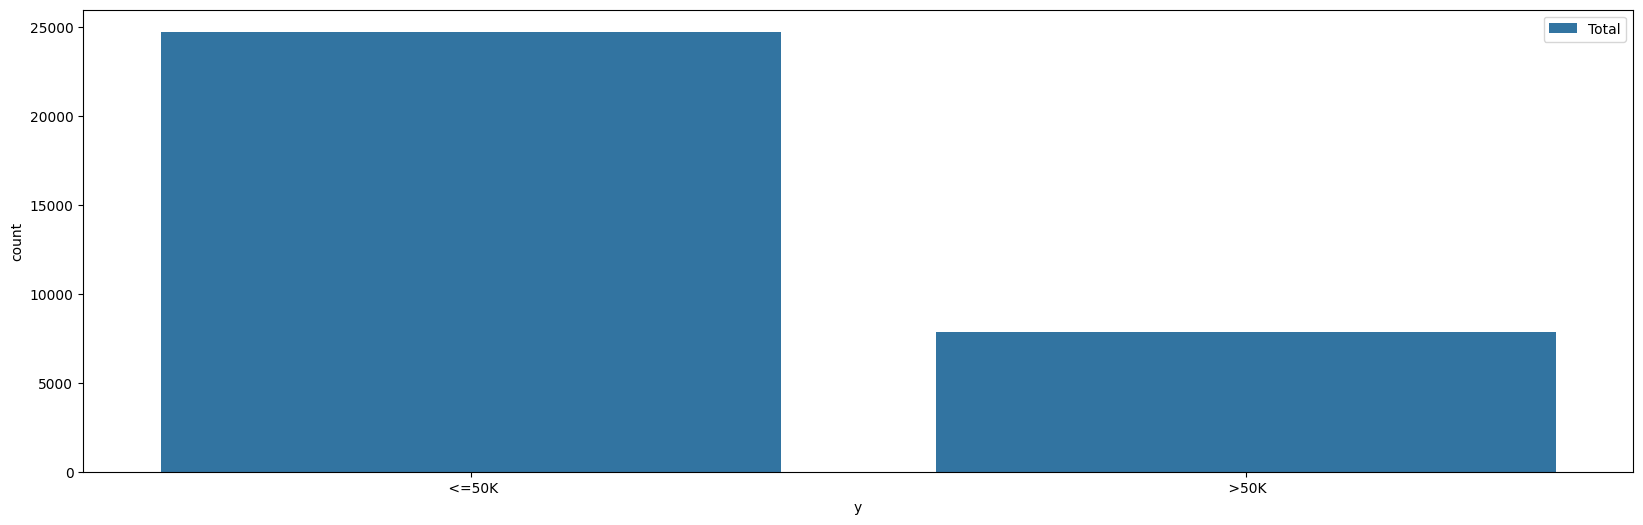

In [128]:
plot_bars(adult_data_df, 'y')

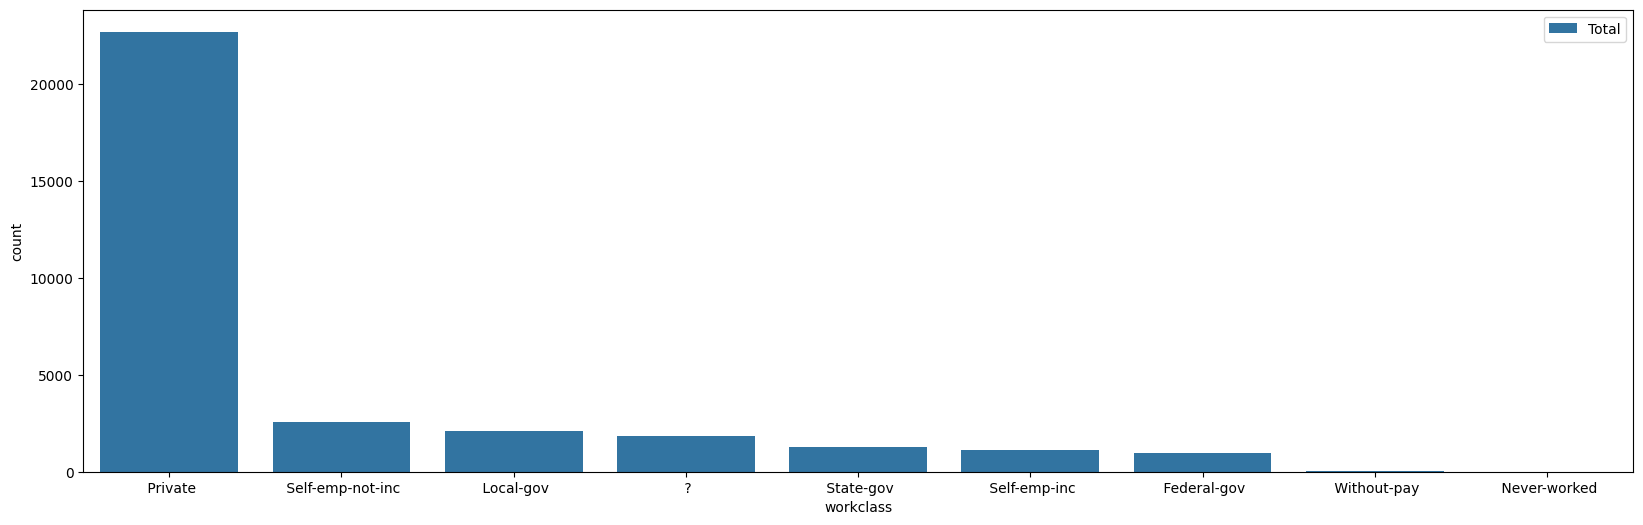

In [129]:
plot_bars(adult_data_df, 'workclass')

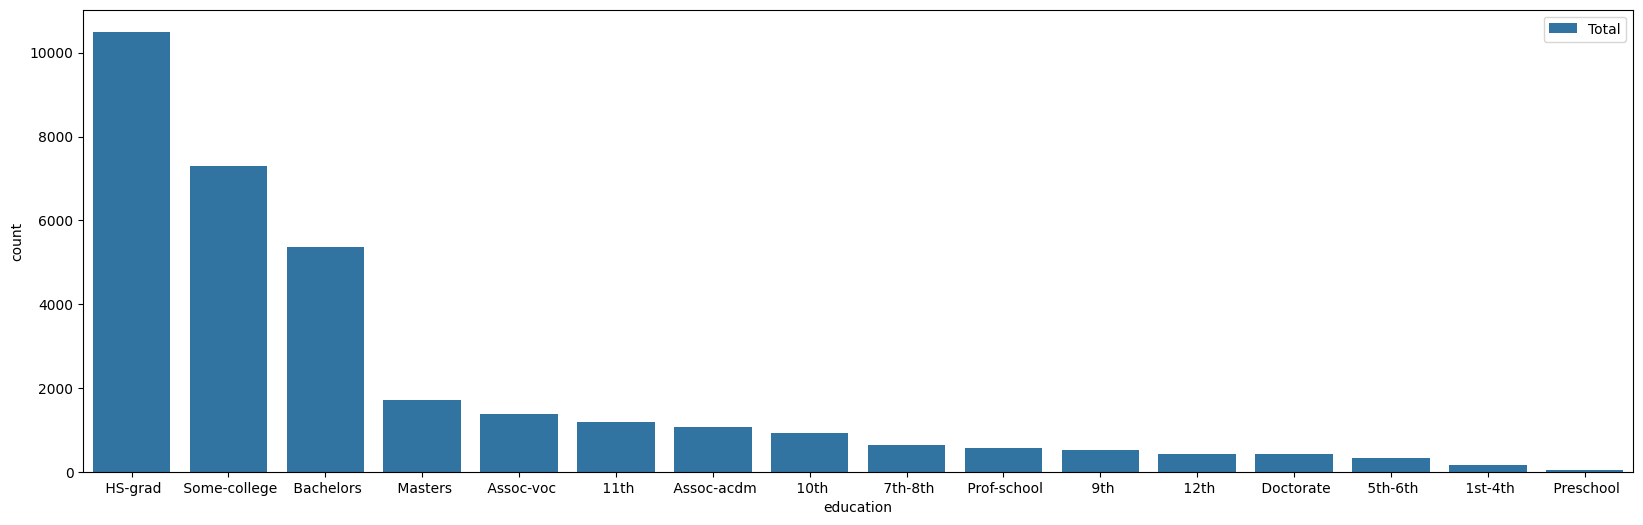

In [130]:
plot_bars(adult_data_df, 'education')

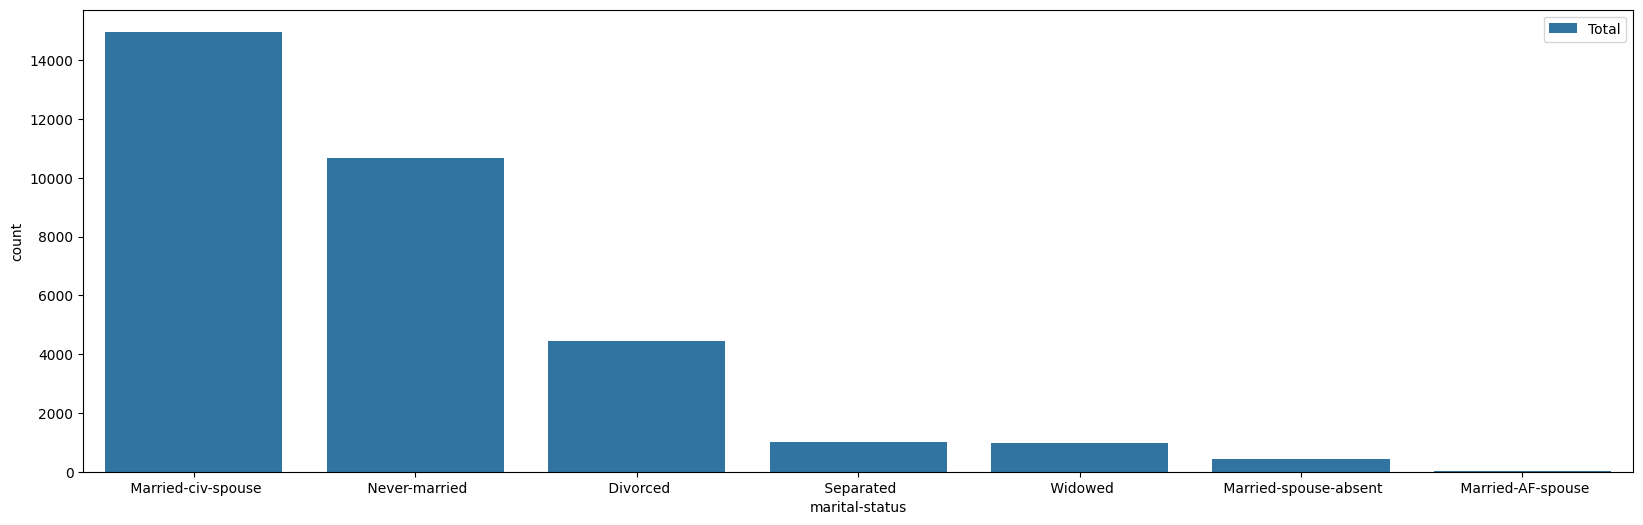

In [131]:
plot_bars(adult_data_df, 'marital-status')

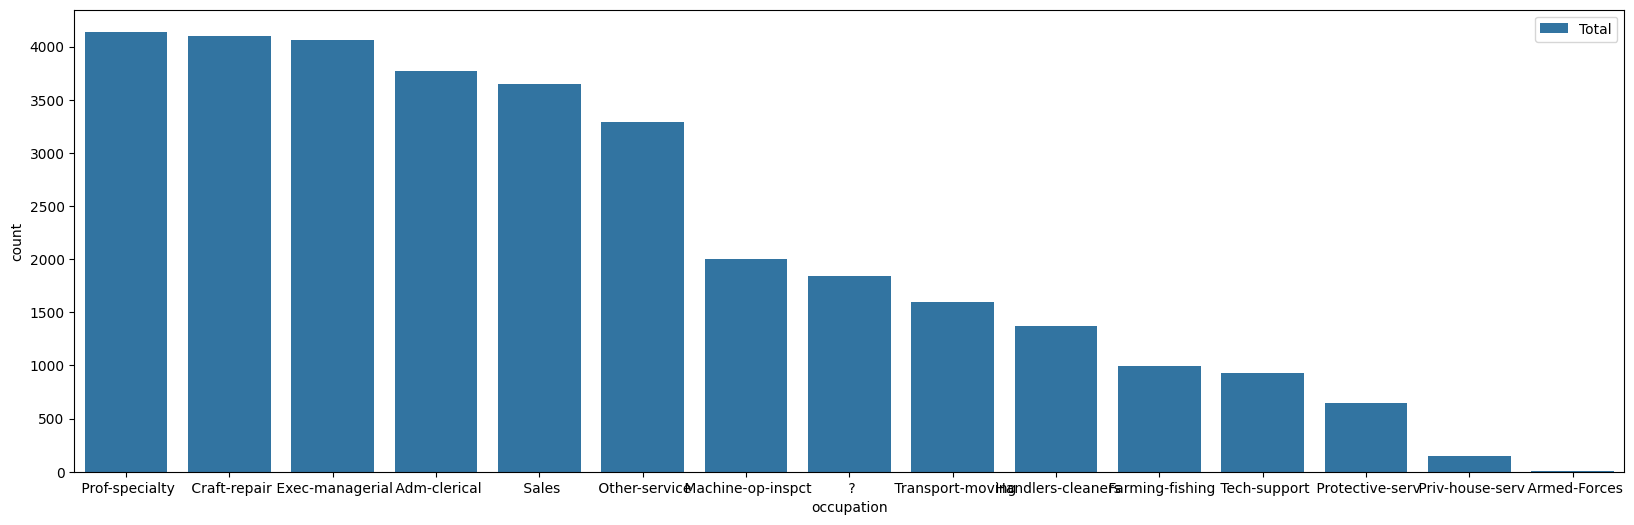

In [132]:
plot_bars(adult_data_df, 'occupation')

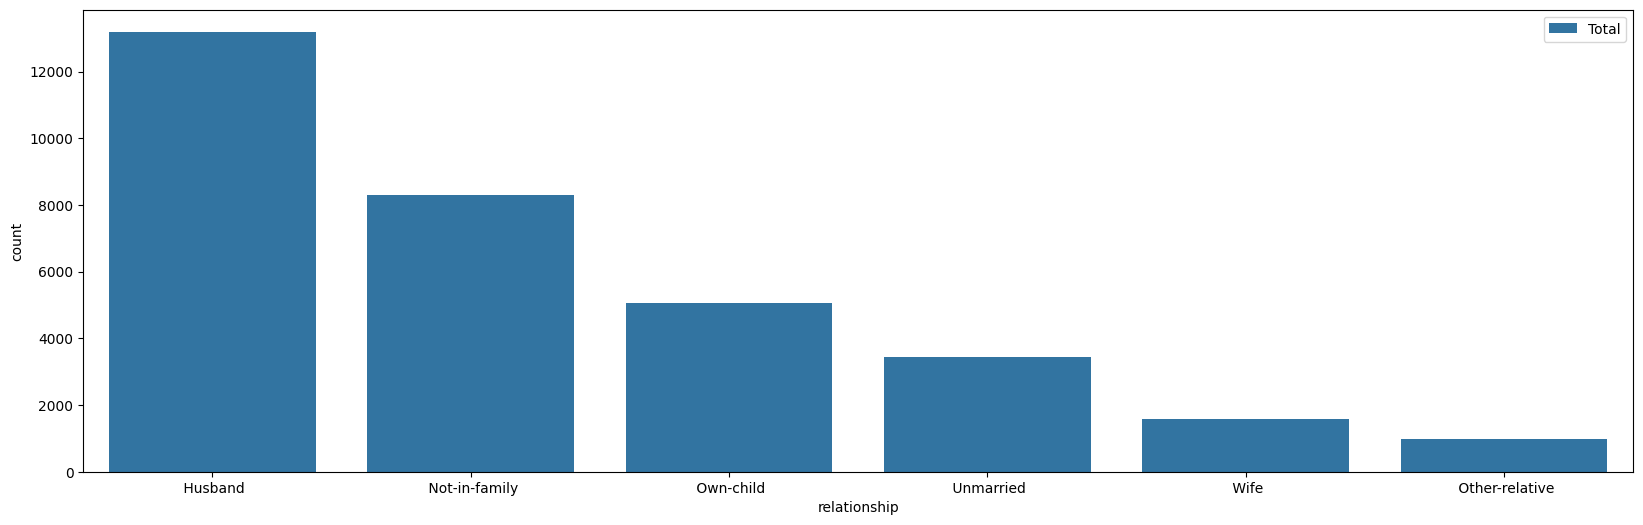

In [133]:
plot_bars(adult_data_df, 'relationship')

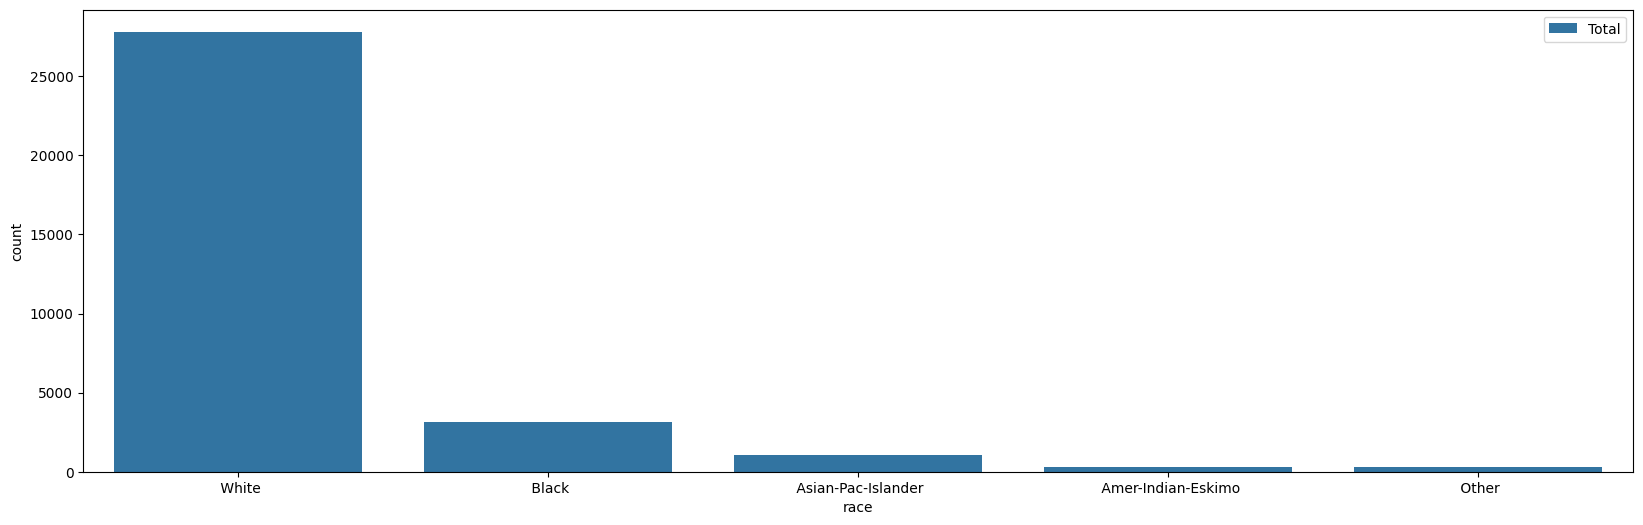

In [134]:
plot_bars(adult_data_df, 'race')

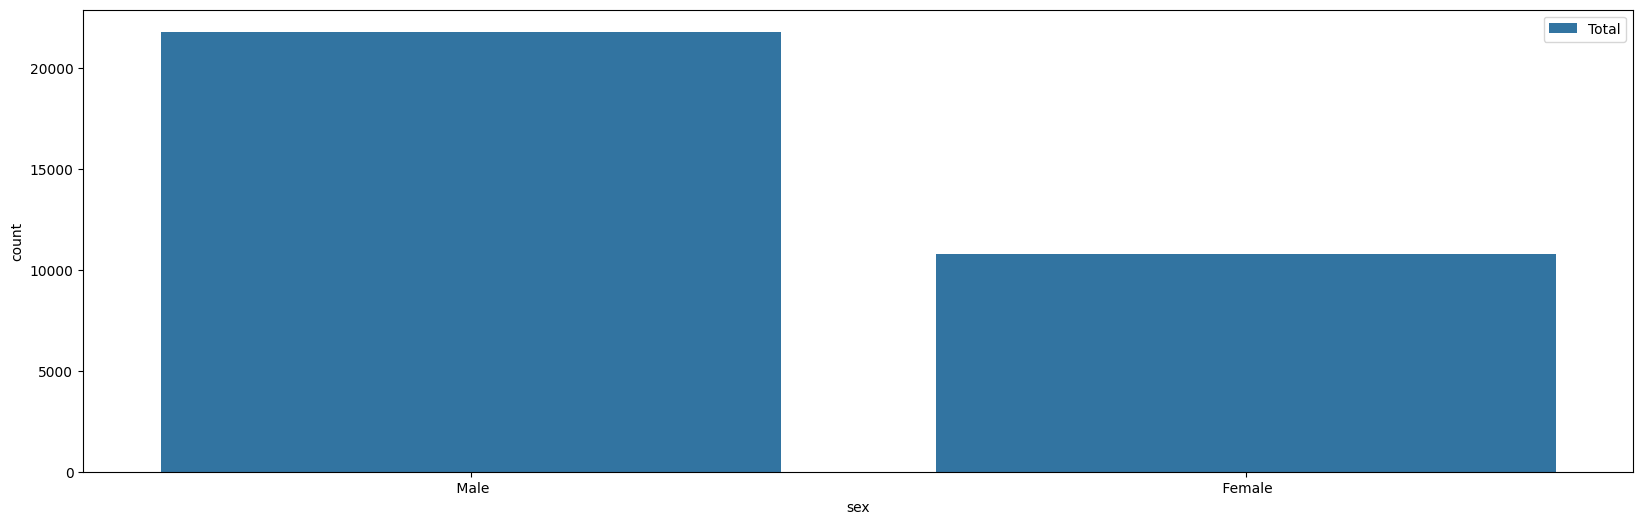

In [135]:
plot_bars(adult_data_df, 'sex')

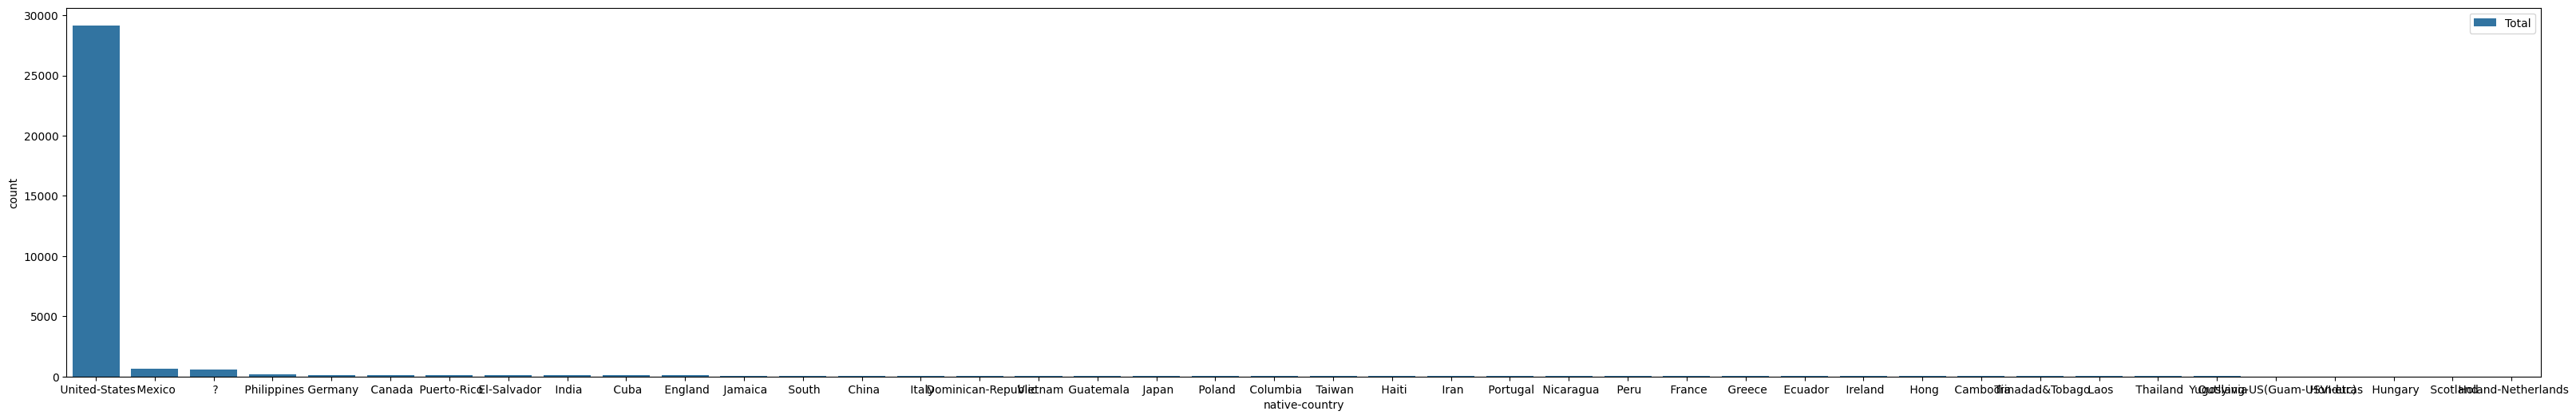

In [136]:
plot_bars(adult_data_df, 'native-country', figsize=(40, 6))

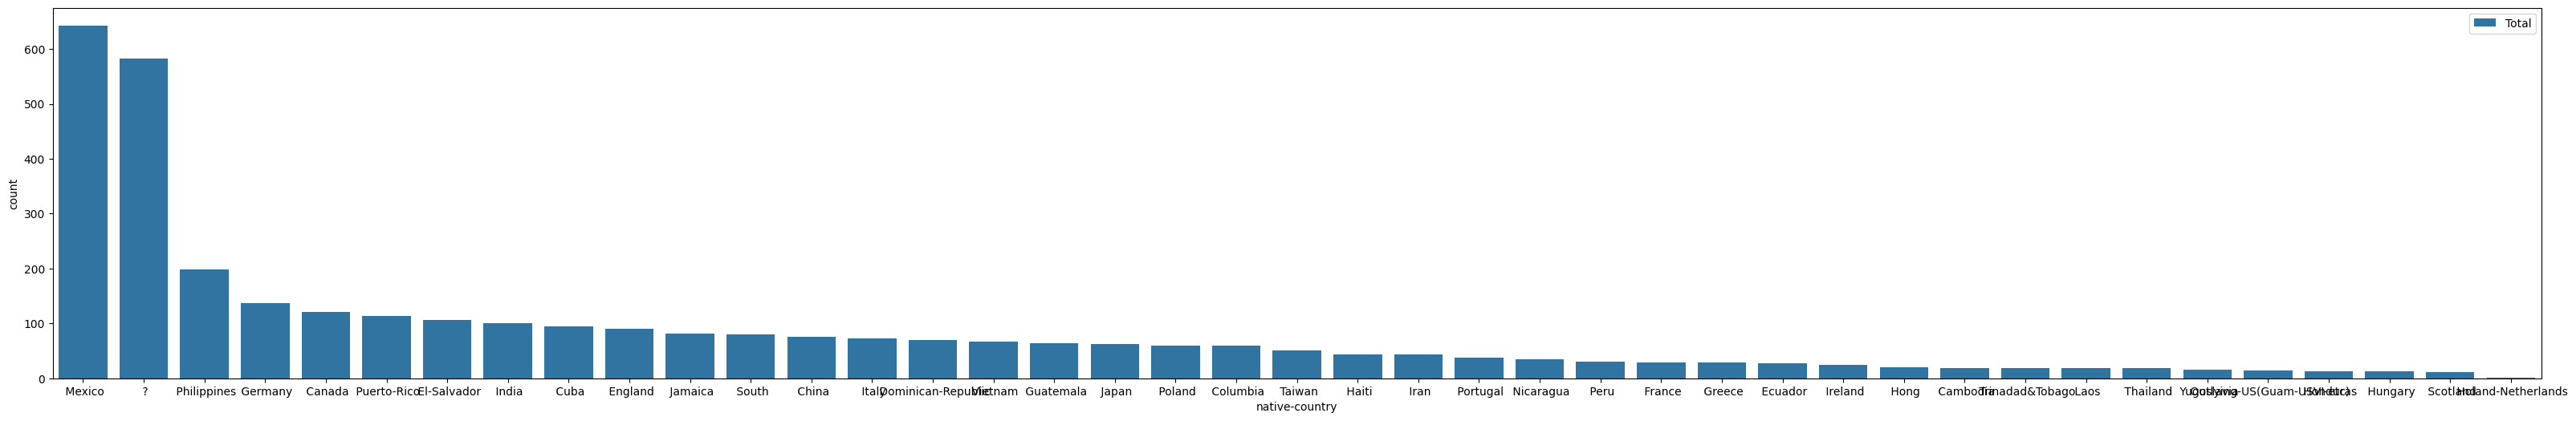

In [137]:
plot_bars(adult_data_df[adult_data_df['native-country'] != ' United-States'], 'native-country', figsize=(40, 6))

## Correlations


<Axes: >

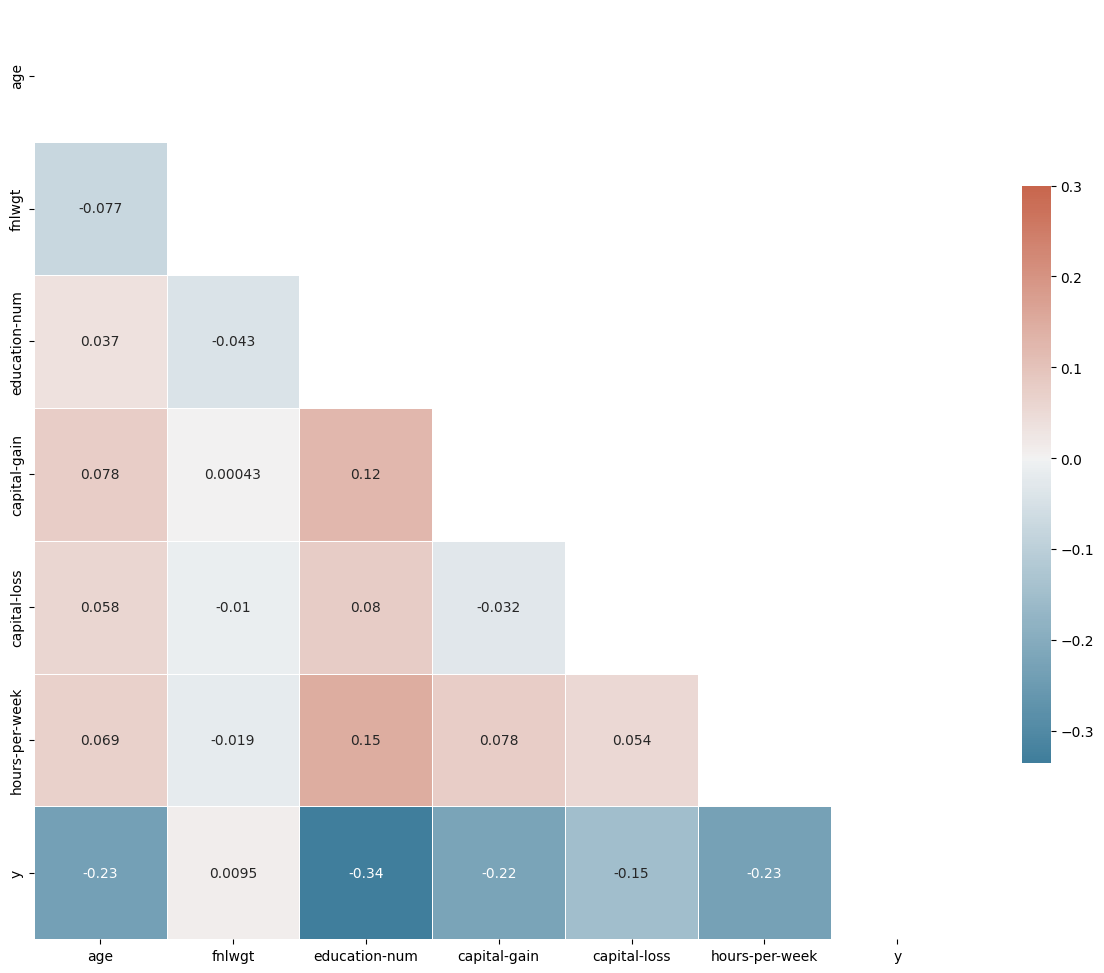

In [138]:
numerical_df = adult_data_df.drop(columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])
numerical_df['y'] = numerical_df['y'].map(lambda col: int(col == ' <=50K'))
# numerical_df
corr = numerical_df.corr()

f, ax = plt.subplots(figsize=(15, 15))
mask = np.triu(np.ones_like(corr, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True, mask=mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})